In [1]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [3]:
#loading the dataset to the variable df as a dataframe with the help of pandas library
file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='latin1')


#inspect the dataset
print(df.head())
print(df.info())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [4]:
# removing the unwanted columns from the dataframe
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)


In [5]:
#inspect the dataset
print(df.head())
print(df.info())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [6]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=81f07d7e6145436026589008980410876a47efe0548a0f0139b6a29c7c38b5d1
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [7]:
import pandas as pd
from langdetect import detect, DetectorFactory

# Fix random seed for consistent results
DetectorFactory.seed = 0


# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except Exception:
        return "unknown"

# Apply language detection and display the results
print("Detecting languages in the dataset...")
languages = df['v2'].apply(detect_language)

# Display the detected languages with counts
language_counts = languages.value_counts()
print("\nLanguage Distribution:")
print(language_counts)

# Create a new column 'language' with detected language codes
df['language'] = df['v2'].apply(detect_language)

# Filter rows where language is 'en'
english_texts = df[df['language'] == 'en']

# Save the filtered English texts to a new CSV file
english_texts.to_csv('english_texts.csv', index=False)

print(f"Saved {len(english_texts)} English texts to 'english_texts.csv'.")



Detecting languages in the dataset...

Language Distribution:
v2
en         5043
af           79
it           54
fr           42
no           41
nl           38
so           36
cy           33
id           29
de           24
tl           19
ca           16
da           14
sv           13
sw           13
et           11
es            9
sk            7
hr            7
sl            7
sq            7
pl            7
vi            5
pt            5
unknown       3
ro            3
tr            3
fi            2
cs            1
lt            1
Name: count, dtype: int64
Saved 5043 English texts to 'english_texts.csv'.


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# Load the the english only spam dataset
dataset = pd.read_csv('english_texts.csv')
stop_words = set(stopwords.words('english'))

# Define a function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join words back to a single string
    return ' '.join(words)

# Apply cleaning to the 'text' column
dataset['cleaned_text'] = dataset['v2'].apply(clean_text)

# Save the cleaned dataset
dataset.to_csv('cleaned_spam.csv', index=False)

print("Text cleaning complete. Cleaned dataset saved to 'cleaned_spam.csv'.")


Text cleaning complete. Cleaned dataset saved to 'cleaned_spam.csv'.


In [10]:
#load the english only- clean spam dataset
df = pd.read_csv('cleaned_spam.csv')

# Filter ham texts
ham_texts = df[df['v1'] == 'ham']


# Save to a new CSV file
ham_texts.to_csv('ham_texts.csv', index=False)

print("Ham texts saved to 'ham_texts.csv'.")

# Spam Detection
# Text Preprocessing
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['v2'])
y = df['v1']  # 'spam' or 'ham'

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Ham texts saved to 'ham_texts.csv'.


In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('cleaned_spam.csv')

# Check for null or non-string values
print(df['cleaned_text'].isnull().sum())  # Count of null values
print(df['cleaned_text'].apply(lambda x: isinstance(x, str)).value_counts())  # Count of non-string values

# Replace null or non-string values with an empty string
df['cleaned_text'] = df['cleaned_text'].fillna('').astype(str)


# Encode labels (spam = 1, ham = 0)
df['label'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

# Tokenization and padding
max_words = 10000  # Vocabulary size
max_len = 100      # Maximum sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])


3
cleaned_text
True     5040
False       3
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 33s 149ms/step - accuracy: 0.8341 - loss: 0.4689 - val_accuracy: 0.8523 - val_loss: 0.4188
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.8533 - loss: 0.4225 - val_accuracy: 0.8523 - val_loss: 0.4187
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.8548 - loss: 0.4185 - val_accuracy: 0.8523 - val_loss: 0.4187
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.8545 - loss: 0.4171 - val_accuracy: 0.8523 - val_loss: 0.4187
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.8548 - loss: 0.4183 - val_accuracy: 0.8523 - val_loss: 0.4191
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       860
           1       0.00      0.00      0.00       149

    accuracy                           0.85      1009
   macro avg       0.43      0.50      0.46      1009
weighted avg  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


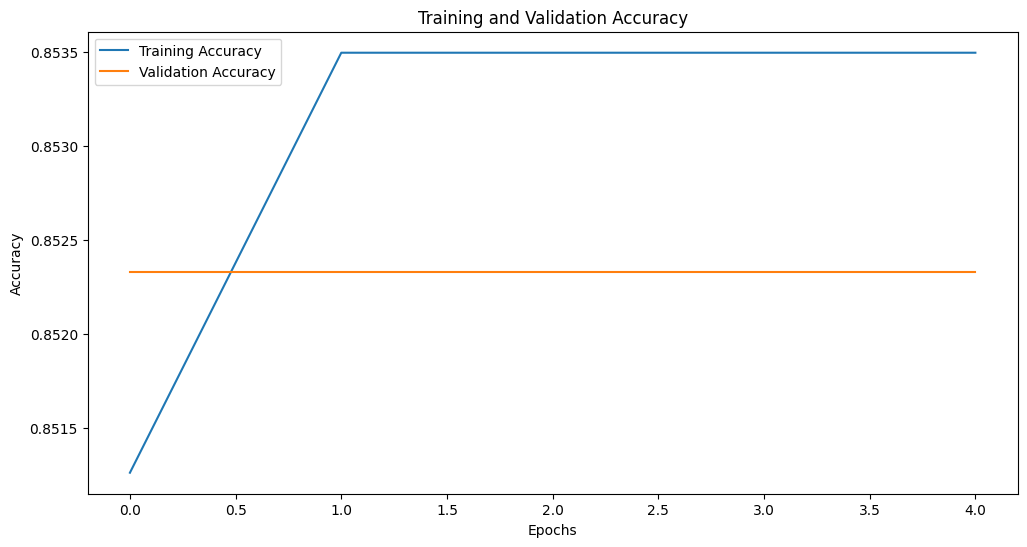

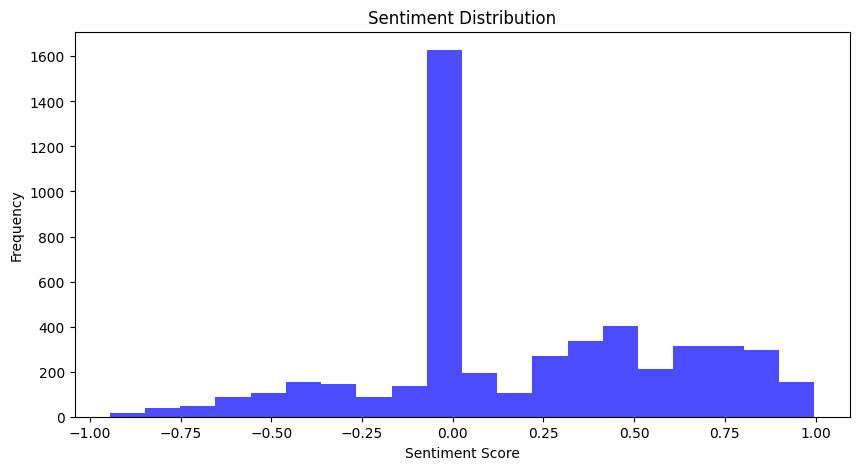

In [12]:

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Keras model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Visualize sentiment results
plt.figure(figsize=(10, 5))
plt.hist(df['sentiment'], bins=20, color='blue', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
